In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.signal import detrend

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals import joblib

In [4]:
sfreq = "06"

In [5]:
sgpsCOM = "U"

In [6]:
gps_selectOPT = 0
dvv_selectOPT = 0

#combineOPT = 1 # gps & dvv
combineOPT = 0 # gps_only
#combineOPT = 2 # dvv_only


In [7]:
sta = "TMBU"
sta = "NORM"
sta = "ASBU"
sta = "SWNB"


In [8]:
df_gps_all = pd.read_csv('http://ncedc.org/ftp/outgoing/taira/NB/NB_gps'+sgpsCOM+'_all.out')


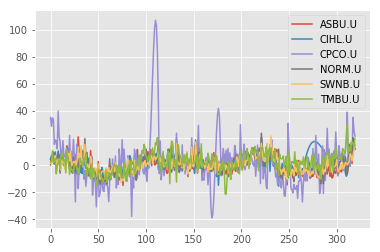

In [9]:
df_gps_all.plot()

In [10]:
df_gps_all.describe()

ASBU.U      CIHL.U      CPCO.U      NORM.U      SWNB.U      TMBU.U
count  320.000000  320.000000  320.000000  320.000000  320.000000  320.000000
mean     0.642221    1.974499    2.916063    0.663348    0.834352    2.238792
std      6.385089    6.489114   18.847805    6.786361    5.622564    7.385933
min    -14.914475  -15.442385  -38.912733  -14.219334  -12.761932  -21.493513
25%     -4.323327   -2.784576   -8.116610   -4.449303   -2.861929   -2.650142
50%      0.007583    1.696377    1.079059    0.347983    0.696404    2.317617
75%      5.230628    5.946332   10.226971    5.172212    3.802115    7.286471
max     20.988162   17.527560  107.105480   23.700000   21.609910   30.290232

In [11]:
gps_staOUT = sta+'.'+sgpsCOM
print(gps_staOUT)

SWNB.U


In [12]:
if gps_selectOPT:
    df_gps = df_gps_all.loc[:,[gps_staOUT]]
else:
    df_gps = df_gps_all

#df_gps = df_gps.loc[:,['TMBU.U']]

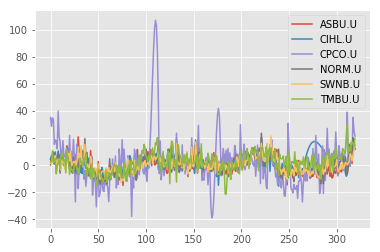

In [13]:
df_gps.plot()

In [14]:
array_gps = df_gps.as_matrix()

In [15]:
#df1 = pd.read_csv('http://ncedc.org/ftp/outgoing/taira/NB/gps_all.out')
#df1 = pd.read_csv('http://ncedc.org/ftp/outgoing/taira/NB/NB_gps_all.out')
df1_all = pd.read_csv('http://ncedc.org/ftp/outgoing/taira/NB/NB_dvv'+sfreq+'_all.out')
#df1 = pd.read_csv('http://ncedc.org/ftp/outgoing/taira/NB/NB_dvv04_all.out')

df1_all.head()

ASBU.06   CIHL.06   CPCO.06   NORM.06   SWNB.06   TMBU.06
0 -0.093135 -0.052336 -0.372242 -0.206703 -0.149774 -0.132132
1 -0.187584 -0.083326 -0.291437 -0.093942 -0.117817 -0.148513
2 -0.246168 -0.212983 -0.368819 -0.149359 -0.106296 -0.054143
3 -0.227978 -0.033900 -0.064907 -0.124719 -0.011144 -0.159022
4 -0.144281 -0.082999 -0.289546 -0.117587  0.092147 -0.053137

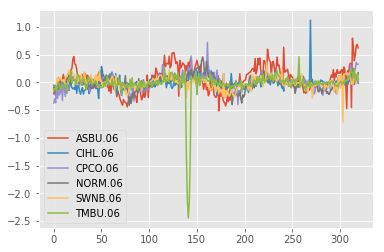

In [16]:
df1_all.plot()

In [17]:
dvv_staOUT = sta+'.'+sfreq
print(dvv_staOUT)

SWNB.06


In [18]:
#df1 = df1.loc[:,['CIHL.05','CPCO.05','NORM.05','SWNB.05','TMBU.05']]
#df1 = df1.loc[:,['CPCO.05','NORM.05']] # inside
#df1 = df1.loc[:,['CIHL.05','SWNB.05','TMBU.05']]

#df1 = df1.loc[:,['CIHL.'+sfreq,'SWNB.'+sfreq]]
#df1 = df1.loc[:,['CIHL.'+sfreq,'CPCO.'+sfreq,'NORM.'+sfreq,'SWNB.'+sfreq,'TMBU.'+sfreq]]
#df1 = df1.loc[:,['CIHL.'+sfreq,'CPCO.'+sfreq,'NORM.'+sfreq,'SWNB.'+sfreq]]
#df1 = df1_all.loc[:,['SWNB.'+sfreq]]
if gps_selectOPT:
    df1 = df1_all.loc[:,[dvv_staOUT]]
else:
    df1 = df1_all

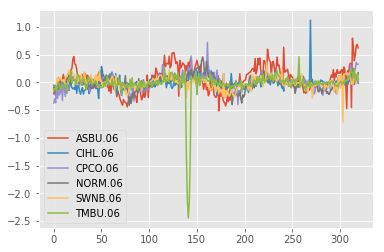

In [19]:
df1.plot()

In [20]:
type(df1)

pandas.core.frame.DataFrame

In [21]:
df1.describe()

ASBU.06     CIHL.06     CPCO.06     NORM.06     SWNB.06     TMBU.06
count  320.000000  320.000000  320.000000  320.000000  320.000000  320.000000
mean     0.062841   -0.006641   -0.000302   -0.012894   -0.005614   -0.025856
std      0.235798    0.114049    0.137247    0.128725    0.110795    0.255438
min     -0.515784   -0.290663   -0.399209   -0.415092   -0.716035   -2.442348
25%     -0.082188   -0.069932   -0.090528   -0.086159   -0.061605   -0.052312
50%      0.062334   -0.011096    0.001424   -0.016155   -0.005242   -0.011417
75%      0.210084    0.043395    0.084435    0.060961    0.064425    0.047236
max      0.795302    1.118924    0.720854    0.457411    0.363442    0.462184

In [22]:
df1.shape

(320, 6)

In [23]:
column_name_list = df1.columns
print(column_name_list)

Index(['ASBU.06', 'CIHL.06', 'CPCO.06', 'NORM.06', 'SWNB.06', 'TMBU.06'], dtype='object')


In [24]:
type(df1[column_name_list[0]])

pandas.core.series.Series

In [25]:
array_dvv = df1.as_matrix()

In [26]:
#print(array)

In [27]:
#df_all = pd.concat([df1, df_gps], axis=1)

if combineOPT == 1:
# combine
    df_all = pd.concat([df_gps, df1], axis=1)
elif combineOPT == 0:
# gps only 
    df_all = df_gps
elif combineOPT == 2:
    dv_all = dv1


In [28]:
df_all.head()

ASBU.U    CIHL.U     CPCO.U    NORM.U    SWNB.U     TMBU.U
0  4.554841  4.518401  35.299612  0.239729  1.216381   2.481875
1  2.911189  7.086239  28.743929  6.461950  2.259260   3.394620
2  5.221619  3.991204  34.934711  3.754738  2.594739  10.691400
3  9.889930  3.850700  33.763461  4.389607  3.837703   1.818904
4  5.257657  9.066199  15.391628  0.799838  2.909213   4.408800

In [29]:
#df_all = df_all(:,1)*-1
#df_all.iloc[:,0] *= 0.02
#df_all.iloc[:,1] *= 0.02
#df_all.iloc[:,2] *= 0.02
#df_all.iloc[:,3] *= 0.02
#df_all.iloc[:,4] *= 0.02

#df.iloc[2, 2] += 5


In [30]:
df_all.head()

ASBU.U    CIHL.U     CPCO.U    NORM.U    SWNB.U     TMBU.U
0  4.554841  4.518401  35.299612  0.239729  1.216381   2.481875
1  2.911189  7.086239  28.743929  6.461950  2.259260   3.394620
2  5.221619  3.991204  34.934711  3.754738  2.594739  10.691400
3  9.889930  3.850700  33.763461  4.389607  3.837703   1.818904
4  5.257657  9.066199  15.391628  0.799838  2.909213   4.408800

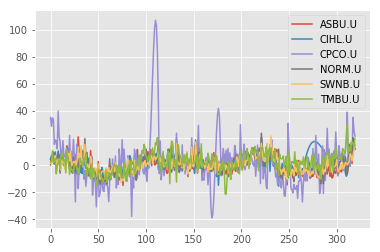

In [31]:
df_all.plot()

In [32]:
#array = np.hstack((array_dvv,array_gps))
array = df_all.as_matrix()

In [33]:
a1 = array[:,1]
#print(a1)

In [34]:
print(array)

[[  4.55484079   4.51840053  35.29961186   0.23972889   1.21638114
    2.48187476]
 [  2.91118899   7.0862385   28.74392946   6.46195019   2.2592605
    3.39462018]
 [  5.22161874   3.99120384  34.9347105    3.75473817   2.59473943
   10.6914003 ]
 ..., 
 [ 14.15660575  12.74547301  35.40256446  20.3851838    7.38510596
   16.03970464]
 [ 11.49110288  14.39703804  25.67762971  12.11817562  10.97879774
   13.57293422]
 [ 14.89803975  11.79760552  21.47296809  11.93944754  16.17875402
   19.91777611]]


In [35]:
array.shape

(320, 6)

In [36]:
#ipc = 28
ipc = 6
ipc = 2

In [37]:
skpca = PCA(n_components=ipc)
#skpca = pca.PCA()


In [38]:
skpca.fit(array)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
joblib.dump(skpca, 'EOF.pkl', compress=9)

['EOF.pkl']

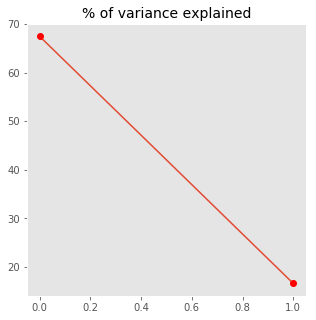

In [40]:
f, ax = plt.subplots(figsize=(5,5))
ax.plot(skpca.explained_variance_ratio_[0:10]*100)
ax.plot(skpca.explained_variance_ratio_[0:10]*100,'ro')
ax.set_title("% of variance explained", fontsize=14)
ax.grid()

In [41]:
ipcOUT = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.70)[0][0]


In [42]:
print(ipcOUT)

1


In [43]:
transformed = skpca.fit_transform(array)
#PCs = skpca.transform(array)

In [44]:
#print(PCs)

In [45]:
#print(transformed)

In [46]:
PCs = transformed[:,:ipc]

In [47]:
EOFs = skpca.components_

In [48]:
EOFs.shape

(2, 6)

In [49]:
print(EOFs)

[[ 0.13600451  0.0955079   0.9476739   0.17236332  0.13950236  0.15850923]
 [-0.44771065 -0.30997222  0.31843691 -0.50965271 -0.40470611 -0.42253688]]


In [50]:
EOFs = EOFs[:ipc,:]

In [51]:
EOFs.shape

(2, 6)

In [52]:
print(EOFs)

[[ 0.13600451  0.0955079   0.9476739   0.17236332  0.13950236  0.15850923]
 [-0.44771065 -0.30997222  0.31843691 -0.50965271 -0.40470611 -0.42253688]]


In [53]:
B = np.array([1, 2])
A = np.array([[5, 6], [7, 8]])
np.dot(A, B) 

array([17, 23])

In [54]:
B.shape

(2,)

In [55]:
print(B)

[1 2]


In [56]:
B.transpose

<function ndarray.transpose>

In [57]:
print(B)

[1 2]


In [58]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
x.shape


(2, 3)

In [59]:
x = np.array([1, 2, 3], np.int32)
x.shape


(3,)

In [60]:
x = np.array([[1],[2],[4]], np.int32)
x.shape

(3, 1)

In [61]:
# extract EOFs for 1st site
EOF_1st = EOFs[:,0:1] # take all EOFS values
#EOF_1st = EOFs[0:1,:]
EOF_1st = EOFs[0,0:1] # take 1st one for 1st site
EOF_2nd = EOFs[1,0:1] # take 1st one for 1st site

EOF_1st_sta = EOFs[:,0:1] # 1st stations all


In [62]:
EOF_1st_sta 

array([[ 0.13600451],
       [-0.44771065]])

In [63]:
EOF_1st.shape

(1,)

In [64]:
print(EOF_1st)

[ 0.13600451]


In [65]:
print(EOF_2nd)

[-0.44771065]


In [66]:
PCs.shape

(320, 2)

In [67]:
PCs_1st = PCs[:,0:1] # 1st mode 

In [68]:
PCs_1st.shape

(320, 1)

In [69]:
PCs_2nd = PCs[:,1:2] # 1st mode 

In [70]:
PCs_2nd.shape

(320, 1)

In [71]:
Syn_1st_sta = np.dot(PCs, EOF_1st_sta) 
Syn_1st_sta.shape

(320, 1)

In [72]:
Syn_all = np.dot(PCs, EOFs) 
Syn_all.shape

(320, 6)

In [73]:
Syn_1st = np.dot(PCs_1st, EOF_1st) 
#Syn_1st = np.dot(EOF_1st,PCs) 
Syn_2nd = np.dot(PCs_2nd, EOF_2nd) 


In [74]:
Syn_all = Syn_1st + Syn_2nd

In [75]:
Syn_all.shape 

(320,)

In [76]:
#Syn_1st = PCs.shape * EOF_1st

In [77]:
Syn_1st.shape

(320,)

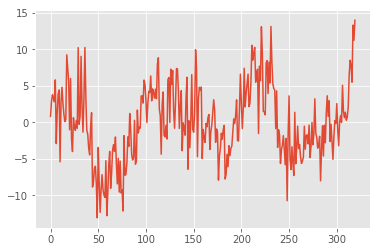

In [78]:
#plt.plot(Syn_1st)
#plt.plot(Syn_2nd)
#plt.plot(Syn_all)
#plt.plot(Syn_1st_sta)
plt.plot(Syn_all)

#plt.plot(array[:,0])

In [79]:
#print(Syn_1st)

In [80]:
scaler_PCs = StandardScaler()

In [81]:
scaler_PCs.fit(PCs)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
PCs_std = scaler_PCs.transform(PCs)
#PCs_std = PCs

In [83]:
#print(PCs)

In [84]:
#print(PCs_std)

In [85]:
PCs_std.shape

(320, 2)

In [86]:
joblib.dump(scaler_PCs, './scaler_PCs.pkl')

['./scaler_PCs.pkl']

In [87]:
#PCdf = pd.DataFrame(PCs_std, index = dsub['time'], \
#                    columns = ["EOF%s" % (x) for x in range(1, PCs_std.shape[1] +1)])

PCdf = pd.DataFrame(PCs_std,  \
                    columns = ["EOF%s" % (x) for x in range(1, PCs_std.shape[1] +1)])

In [88]:
#PCdf.head

In [89]:
PCdf.to_csv('./EOF_ERSST_PCs.csv')

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


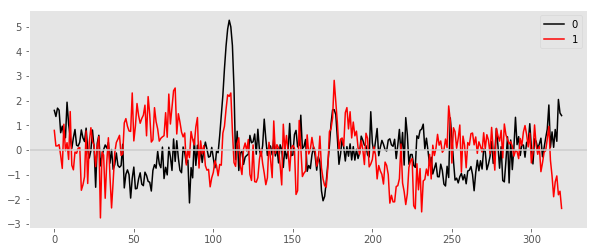

In [90]:
ipcOUT = 0
ipcOUT1 = 1
#ipcOUT2 = 2
#ipcOUT3 = 3

f, ax = plt.subplots(figsize=(10,4))
#PCdf.ix[:,0].plot(ax=ax, color='k', label='PC1')
#PCdf.ix[:,1].plot(ax=ax, color='k', label='PC1')
PCdf.ix[:,ipcOUT].plot(ax=ax, color='k', label=ipcOUT)
PCdf.ix[:,ipcOUT1].plot(ax=ax, color='r', label=ipcOUT1)
#PCdf.ix[:,ipcOUT2].plot(ax=ax, color='b', label=ipcOUT2)
#PCdf.ix[:,ipcOUT3].plot(ax=ax, color='k', label=ipcOUT)

#PCdf.ix[:,1].plot(ax=ax, color='r', label=4)

ax.axhline(0, c='0.8')
#ax.set_xlabel('period', fontsize=18)
#ax.plot(PCdf.index, detrend(PCdf.ix[:,0].values), 'r',  label='PC1 (trend removed)')
#ax.plot(PCdf.index, detrend(PCdf.ix[:,1].values), 'r',  label='PC1 (trend removed)')
#ax.plot(PCdf.index, detrend(PCdf.ix[:,ipcOUT].values), 'r',  label='PC1 (trend removed)')

ax.grid('off')
ax.legend(loc=1); 

# 

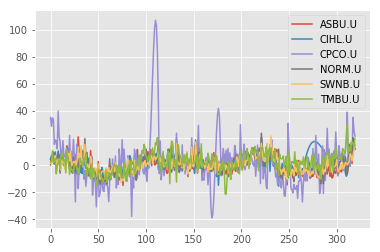

In [91]:
df_all.plot()